This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [26]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.6227 - accuracy: 0.8108 - val_loss: 0.2989 - val_accuracy: 0.9073
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2542 - accuracy: 0.9211 - val_loss: 0.2275 - val_accuracy: 0.9283
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1656 - accuracy: 0.9488 - val_loss: 0.1455 - val_accuracy: 0.9563
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1204 - accuracy: 0.9628 - val_loss: 0.1334 - val_accuracy: 0.9603
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0888 - accuracy: 0.9721 - val_loss: 0.1299 - val_accuracy: 0.9635
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.1358 - val_accuracy: 0.9622
Epoch 7/10
375/375 [==============================] - 5s 15ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.1150 - val_accuracy: 0.9682

In [28]:
model3 = get_model()
history_original = model3.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2971 - accuracy: 0.9152 - val_loss: 0.1502 - val_accuracy: 0.9590
Epoch 2/10
375/375 [==============================] - 4s 9ms/step - loss: 0.1223 - accuracy: 0.9644 - val_loss: 0.1202 - val_accuracy: 0.9643
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0809 - accuracy: 0.9765 - val_loss: 0.0936 - val_accuracy: 0.9708
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0578 - accuracy: 0.9827 - val_loss: 0.0781 - val_accuracy: 0.9762
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0425 - accuracy: 0.9878 - val_loss: 0.0804 - val_accuracy: 0.9767
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0322 - accuracy: 0.9907 - val_loss: 0.0753 - val_accuracy: 0.9765
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.0762 - val_accuracy: 0.9775
Epoch

**Plotting a validation accuracy comparison**

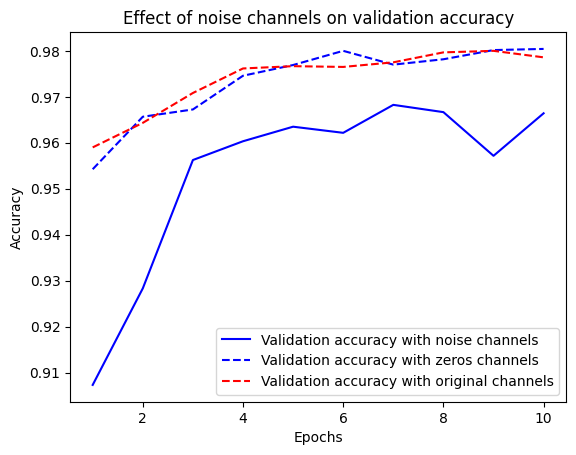

In [29]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [31]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 2.3153 - accuracy: 0.1037 - val_loss: 2.3049 - val_accuracy: 0.1060
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 2.2993 - accuracy: 0.1158 - val_loss: 2.3118 - val_accuracy: 0.0986
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 2.2914 - accuracy: 0.1268 - val_loss: 2.3152 - val_accuracy: 0.1056
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2801 - accuracy: 0.1376 - val_loss: 2.3259 - val_accuracy: 0.1016
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2663 - accuracy: 0.1491 - val_loss: 2.3309 - val_accuracy: 0.1010
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 2.2475 - accuracy: 0.1640 - val_loss: 2.3479 - val_accuracy: 0.1010
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2252 - accuracy: 0.1795 - val_loss: 2.3571 - val_accuracy: 0.1021
Epoc

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [36]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3440 - accuracy: 0.9118 - val_loss: 0.1575 - val_accuracy: 0.9541
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1234 - accuracy: 0.9643 - val_loss: 0.1328 - val_accuracy: 0.9639
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0938 - accuracy: 0.9744 - val_loss: 0.1591 - val_accuracy: 0.9663
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0813 - accuracy: 0.9786 - val_loss: 0.1564 - val_accuracy: 0.9693
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0717 - accuracy: 0.9818 - val_loss: 0.1583 - val_accuracy: 0.9722
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0623 - accuracy: 0.9843 - val_loss: 0.1716 - val_accuracy: 0.9726
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0571 - accuracy: 0.9864 - val_loss: 0.1920 - val_accuracy: 0.9726
E

**The same model with a more appropriate learning rate**

In [37]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3545 - accuracy: 0.9125 - val_loss: 0.1554 - val_accuracy: 0.9550
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1269 - accuracy: 0.9647 - val_loss: 0.1261 - val_accuracy: 0.9658
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0974 - accuracy: 0.9742 - val_loss: 0.1461 - val_accuracy: 0.9678
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0814 - accuracy: 0.9789 - val_loss: 0.1413 - val_accuracy: 0.9718
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0672 - accuracy: 0.9832 - val_loss: 0.1590 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0551 - accuracy: 0.9854 - val_loss: 0.1946 - val_accuracy: 0.9662
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0493 - accuracy: 0.9876 - val_loss: 0.1772 - val_accuracy: 0.9753
Epoc

In [38]:
history_model=model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0318 - accuracy: 0.9928 - val_loss: 0.2045 - val_accuracy: 0.9743
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0265 - accuracy: 0.9937 - val_loss: 0.2579 - val_accuracy: 0.9730
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0287 - accuracy: 0.9939 - val_loss: 0.2308 - val_accuracy: 0.9765
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0287 - accuracy: 0.9937 - val_loss: 0.2209 - val_accuracy: 0.9774
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0211 - accuracy: 0.9952 - val_loss: 0.2733 - val_accuracy: 0.9740
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0201 - accuracy: 0.9956 - val_loss: 0.2550 - val_accuracy: 0.9749
Epoch 7/20
375/375 [==============================] - 4s 12ms/step - loss: 0.0215 - accuracy: 0.9957 - val_loss: 0.2415 - val_accuracy: 0.9787
Epoc

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [15]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6687 - accuracy: 0.8335 - val_loss: 0.3584 - val_accuracy: 0.9030
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.9031 - val_loss: 0.3118 - val_accuracy: 0.9135
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.9110 - val_loss: 0.2915 - val_accuracy: 0.9208
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.9159 - val_loss: 0.2840 - val_accuracy: 0.9212
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2920 - accuracy: 0.9182 - val_loss: 0.2788 - val_accuracy: 0.9235
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2851 - accuracy: 0.9204 - val_loss: 0.2792 - val_accuracy: 0.9227
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2806 - accuracy: 0.9220 - val_loss: 0.2708 - val_accuracy: 0.9265
Epoch 

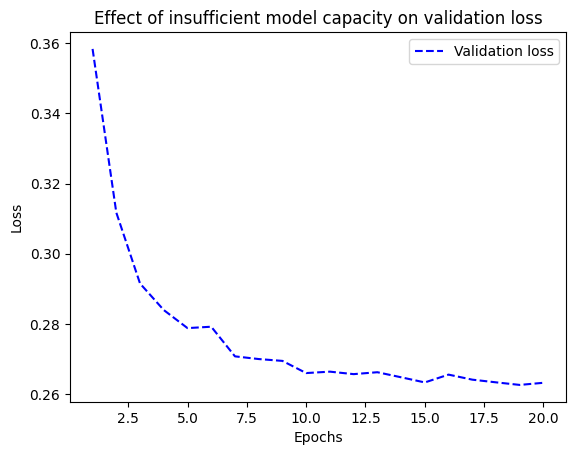

In [16]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [17]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3682 - accuracy: 0.8945 - val_loss: 0.1834 - val_accuracy: 0.9485
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1637 - accuracy: 0.9519 - val_loss: 0.1298 - val_accuracy: 0.9630
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1147 - accuracy: 0.9657 - val_loss: 0.1115 - val_accuracy: 0.9674
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0886 - accuracy: 0.9737 - val_loss: 0.1215 - val_accuracy: 0.9655
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0704 - accuracy: 0.9788 - val_loss: 0.0926 - val_accuracy: 0.9741
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.0961 - val_accuracy: 0.9723
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0963 - val_accuracy: 0.9748
Epoch 

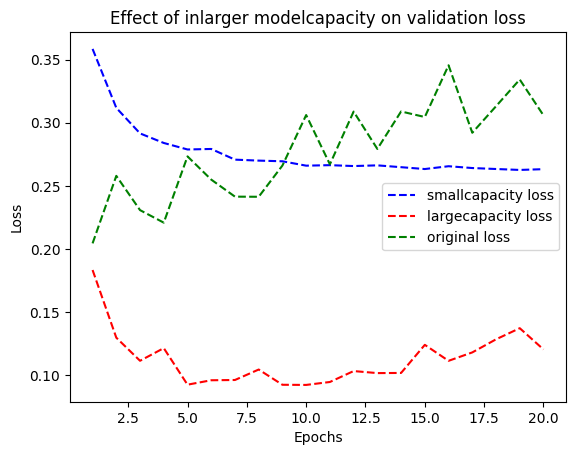

In [39]:
import matplotlib.pyplot as plt
val_small_loss=history_small_model.history["val_loss"]
val_large_loss=history_large_model.history["val_loss"]
val_original_loss=history_model.history["val_loss"]
epochs=range(1,21)
plt.plot(epochs, val_small_loss,"b--",
         label="smallcapacity loss")
plt.plot(epochs, val_large_loss,"r--",
         label="largecapacity loss")
plt.plot(epochs, val_original_loss,"g--",
         label="original loss")
plt.title("Effect of inlarger modelcapacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [18]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5354 - accuracy: 0.7778 - val_loss: 0.4033 - val_accuracy: 0.8674
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3352 - accuracy: 0.8888 - val_loss: 0.3261 - val_accuracy: 0.8754
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2514 - accuracy: 0.9147 - val_loss: 0.2882 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2029 - accuracy: 0.9335 - val_loss: 0.2946 - val_accuracy: 0.8780
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1701 - accuracy: 0.9429 - val_loss: 0.2784 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1450 - accuracy: 0.9531 - val_loss: 0.2966 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1246 - accurac

**Version of the model with lower capacity**

In [19]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6557 - accuracy: 0.6352 - val_loss: 0.6141 - val_accuracy: 0.8086
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5719 - accuracy: 0.8063 - val_loss: 0.5373 - val_accuracy: 0.8196
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4921 - accuracy: 0.8649 - val_loss: 0.4687 - val_accuracy: 0.8552
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4215 - accuracy: 0.8883 - val_loss: 0.4140 - val_accuracy: 0.8676
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3635 - accuracy: 0.9004 - val_loss: 0.3697 - val_accuracy: 0.8785
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3160 - accuracy: 0.9090 - val_loss: 0.3365 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2767 - accuracy: 0.9173 - val_loss: 0.3128 - val_accuracy: 0.8858
Epoch 8/20
30

**Version of the model with higher capacity**

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 8s 244ms/step - loss: 0.5677 - accuracy: 0.7163 - val_loss: 0.3696 - val_accuracy: 0.8418
Epoch 2/20
30/30 [==============================] - 6s 210ms/step - loss: 0.3337 - accuracy: 0.8651 - val_loss: 0.3560 - val_accuracy: 0.8519
Epoch 3/20
30/30 [==============================] - 7s 234ms/step - loss: 0.2349 - accuracy: 0.9053 - val_loss: 0.2830 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 6s 209ms/step - loss: 0.1978 - accuracy: 0.9227 - val_loss: 0.2776 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 7s 239ms/step - loss: 0.1412 - accuracy: 0.9457 - val_loss: 0.3351 - val_accuracy: 0.8764
Epoch 6/20
30/30 [==============================] - 6s 212ms/step - loss: 0.1041 - accuracy: 0.9645 - val_loss: 0.3593 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 7s 238ms/step - loss: 0.0827 - accuracy: 0.9717 - val_loss: 0.4002 - val_accuracy: 0.8735
Epoch 

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [21]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6196 - accuracy: 0.7744 - val_loss: 0.4917 - val_accuracy: 0.8529
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4227 - accuracy: 0.8845 - val_loss: 0.4103 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3431 - accuracy: 0.9104 - val_loss: 0.3845 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3025 - accuracy: 0.9222 - val_loss: 0.3652 - val_accuracy: 0.8834
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2823 - accuracy: 0.9282 - val_loss: 0.3560 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2620 - accuracy: 0.9375 - val_loss: 0.3598 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2537 - accuracy: 0.9407 - val_loss: 0.3613 - val_accuracy: 0.8865
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [22]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6416 - accuracy: 0.6240 - val_loss: 0.5095 - val_accuracy: 0.8416
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5246 - accuracy: 0.7541 - val_loss: 0.4293 - val_accuracy: 0.8461
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4492 - accuracy: 0.8033 - val_loss: 0.3538 - val_accuracy: 0.8810
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3856 - accuracy: 0.8409 - val_loss: 0.3125 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3407 - accuracy: 0.8653 - val_loss: 0.2875 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2974 - accuracy: 0.8884 - val_loss: 0.2871 - val_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2634 - accuracy: 0.9104 - val_loss: 0.2739 - val_accuracy: 0.8907
Epoch 8/20
30

## Summary